# Linear Regression using Neural Networks

## Aim: To implement a neural network model to make predictions using linear regression.

## Dataset: Toy dataset with 5 features.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
x,y =make_regression(n_samples=500,n_features=5,random_state=1)

In [ ]:
x_train,x_rem,y_train,y_rem=train_test_split(x,y,test_size=0.25)
x_test,x_val,y_test,y_val=train_test_split(x_rem,y_rem,test_size=0.5)
print(f"Shape of X\nTrain {x_train.shape}\nValidation {x_val.shape}\nTest {x_test.shape}\n")
print(f"Shape of Y\nTrain {y_train.shape}\nValidation {y_val.shape}\nTest {y_test.shape}")

Shape of X
Train (375, 5)
Validation (63, 5)
Test (62, 5)

Shape of Y
Train (375,)
Validation (63,)
Test (62,)


In [ ]:
model=Sequential()
model.add(Dense(5,input_dim=5,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='linear'))
model.add(Dense(33,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss="mse",optimizer='adam',metrics=['mse','mae'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 30        
                                                                 
 dense_21 (Dense)            (None, 25)                150       
                                                                 
 dense_22 (Dense)            (None, 15)                390       
                                                                 
 dense_23 (Dense)            (None, 33)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 34        
                                                                 
Total params: 1,132
Trainable params: 1,132
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=50,verbose=0)

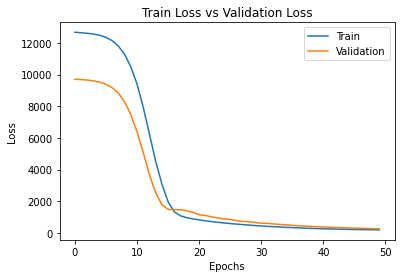

In [ ]:
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title("Train Loss vs Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
y_pred=model.predict(x_test).flatten()

2/2 [==============================] - 0s 5ms/step


In [ ]:
for i in range(10):
 print(f"\nX={x_test[i]}, Actual={y_test[i]}, Predicted={y_pred[i]}")


X=[-0.48877086 -1.08723367  0.38074345  1.13361346 -0.09034437], Actual=-72.26409300859316, Predicted=-71.0714340209961

X=[ 0.72282268  1.34027191  3.7402489  -1.63647401 -0.45877498], Actual=275.8737414895313, Predicted=272.9704895019531

X=[-0.25898285  0.057121   -1.71939447 -0.79954749 -0.2915946 ], Actual=-118.05062936476352, Predicted=-95.10240173339844

X=[ 0.17281608  0.37857558  0.63702532 -0.53969765  1.63062979], Actual=118.91552196138366, Predicted=123.73629760742188

X=[ 1.13548397 -1.07233211  0.71257056 -1.50707559  1.58466204], Actual=8.331859348541968, Predicted=24.236967086791992

X=[ 2.08412285 -0.08060699 -0.19850032  1.30357545  0.13859548], Actual=93.42001391797396, Predicted=90.16461181640625

X=[-0.67124613 -0.39675353 -0.69166075 -0.6871727  -0.84520564], Actual=-139.7093001852112, Predicted=-142.51058959960938

X=[-1.20410135  1.40061789  1.33514133 -1.50017688  0.13887887], Actual=116.23208391354098, Predicted=122.93607330322266

X=[ 2.06318544  0.58688475 

In [ ]:
train=model.evaluate(x_train,y_train)
validate=model.evaluate(x_val,y_val)
test=model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 371.2659 - mse: 371.2659 - mae: 14.2161


In [ ]:
print(f'Train loss {train[0]}, Train MSE {train[1]}, Train MAE {train[2]}\n')
print(f'Validation loss {validate[0]}, Validation MSE {validate[1]}, Validation MAE {validate[2]}\n')
print(f'Test loss {test[0]}, Test MSE {test[1]}, Test MAE {test[2]}\n')

Train loss 191.0343475341797, Train MSE 191.0343475341797, Train MAE 11.013753890991211

Validation loss 267.60845947265625, Validation MSE 267.60845947265625, Validation MAE 13.802900314331055

Test loss 371.265869140625, Test MSE 371.265869140625, Test MAE 14.216127395629883



## Conclusion: The model gave Train MAE of 11.01, validation MAE of 13.8029 and test MAE of 14.2161. We have to tune the model to reduce the error of our model to make accurate predictions.